# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | zarzis
Processing Record 5 of Set 1 | labytnangi
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | tionk essil
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | severo-yeniseyskiy
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | puerto san jose
Processing Record 14 of Set 1 | tromso
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | grand falls-windsor
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,28.44,75,0,7.72,US,1690490038
1,alofi,-19.0595,-169.9187,20.94,88,100,1.54,NU,1690490038
2,grytviken,-54.2811,-36.5092,-0.89,97,100,3.36,GS,1690490038
3,zarzis,33.5040,11.1122,26.73,70,0,5.70,TN,1690490038
4,labytnangi,66.6572,66.4183,15.63,92,78,3.03,RU,1690490038
5,blackmans bay,-43.0167,147.3167,12.07,77,92,3.28,AU,1690490038
6,tionk essil,12.7856,-16.5217,29.03,81,38,4.66,SN,1690490038
7,port mathurin,-19.6833,63.4167,23.52,78,17,6.61,MU,1690490038
8,bethel,41.3712,-73.4140,33.34,64,20,6.69,US,1690490039
9,rongelap,11.1635,166.8941,28.63,80,100,8.79,MH,1690490039


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# convert from unix timestamp to year-month-date
for date in city_data_df["Date"]:
    _ = time.localtime(date)
    city_data_df["Date"] = f"{_.tm_year}-{_.tm_mon}-{_.tm_mday}"

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.44,75,0,7.72,US,2023-7-27
1,alofi,-19.0595,-169.9187,20.94,88,100,1.54,NU,2023-7-27
2,grytviken,-54.2811,-36.5092,-0.89,97,100,3.36,GS,2023-7-27
3,zarzis,33.5040,11.1122,26.73,70,0,5.70,TN,2023-7-27
4,labytnangi,66.6572,66.4183,15.63,92,78,3.03,RU,2023-7-27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# set date variable to use in chart titles below
date = city_data_df.loc[0]["Date"]

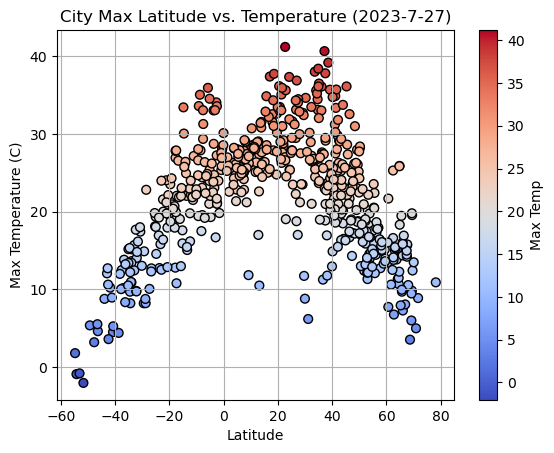

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c='Max Temp', cmap=plt.colormaps.get_cmap('coolwarm'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

"""
Note that Max Temp will skew northerly or southerly,
depending on time of year

from a design standpoint, this is by far the best of the four plots in this section
I like the colormap for this one
it really helps communicate changes in temperature
"""

# Show plot
plt.show()

#### Latitude Vs. Humidity

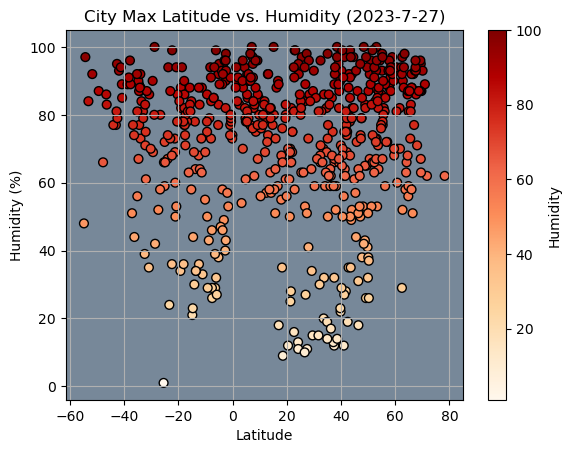

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', c='Humidity', cmap=plt.colormaps.get_cmap('OrRd'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()
plt.gca().set_facecolor('lightslategrey')

# Save the figure
plt.savefig("output_data/Fig2.png")

"""
the colormap is very pretty, but i would eliminate it from any official publication
it looks like humidity means something
yes, i tend to sweat more in high humnidity, and feel hotter...
...but not necessarily at 70 degrees latitude
meaning: pretty colormap, but unneccessarily confusing
"""

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

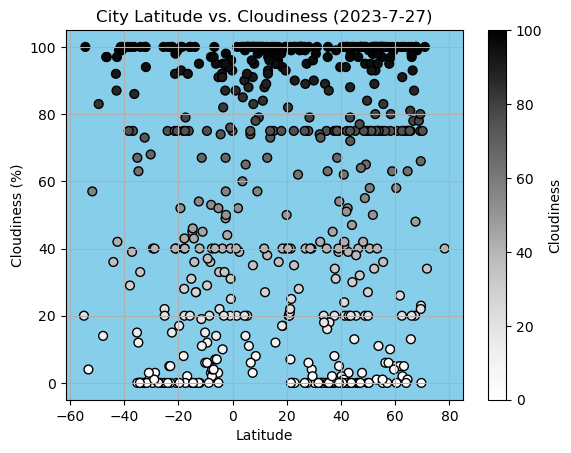

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', c="Cloudiness", s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.gca().set_facecolor('skyblue')

# Save the figure
plt.savefig("output_data/Fig3.png")

"""
colormap kind of depicts changes in cloud cover
i can replace the markers with emojis, like the sunny / partly cloudy / cloudy symbols...
...assuming i learn seaborn or plotly
pretty skyblue background, though
"""

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

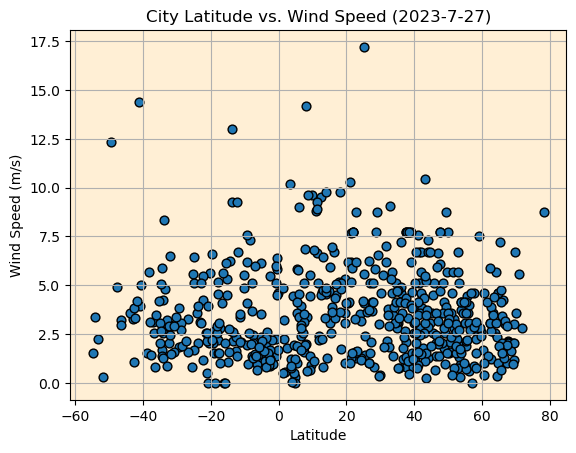

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.gca().set_facecolor('papayawhip')

# Save the figure
plt.savefig("output_data/Fig4.png")

"""
now I've just given up on design, going with a light contrast...
...and my second favorite chart, for its simplicity

but that first one was pretty good, depicting max temp vs latitude
"""

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def reg(df, x, y):
    # plot scatter
    df.plot.scatter(x, y, s=40, edgecolor="black")
    plt.xlabel('Latitude')

    # calculate linear regression and get the slope set to the correct y-intercept
    lr = linregress(df[x], df[y])
    tmp = lr.slope * df[x] + lr.intercept

    # print r-value
    print(f"The r-value is: {lr.rvalue}")

    # plot linear regression and add annotation, moving annotation to the 'best fit' for a plot
    plt.plot(df[x], tmp, color='red')
    _ = f'y = {lr.slope:.2f}x + {lr.intercept:.2f}'
    plt.legend([_], loc='best', labelcolor='red', fontsize=16, handlelength=0)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.44,75,0,7.72,US,2023-7-27
3,zarzis,33.5040,11.1122,26.73,70,0,5.70,TN,2023-7-27
4,labytnangi,66.6572,66.4183,15.63,92,78,3.03,RU,2023-7-27
6,tionk essil,12.7856,-16.5217,29.03,81,38,4.66,SN,2023-7-27
8,bethel,41.3712,-73.4140,33.34,64,20,6.69,US,2023-7-27


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,alofi,-19.0595,-169.9187,20.94,88,100,1.54,NU,2023-7-27
2,grytviken,-54.2811,-36.5092,-0.89,97,100,3.36,GS,2023-7-27
5,blackmans bay,-43.0167,147.3167,12.07,77,92,3.28,AU,2023-7-27
7,port mathurin,-19.6833,63.4167,23.52,78,17,6.61,MU,2023-7-27
11,waitangi,-43.9535,-176.5597,8.79,77,36,3.58,NZ,2023-7-27


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6063134734093192


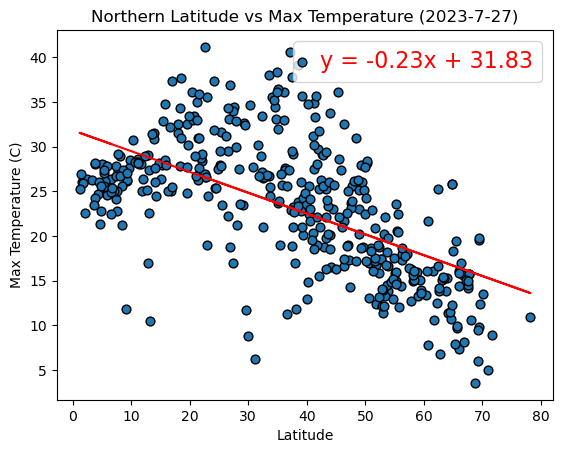

In [16]:
# Linear regression on Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Max Temp')
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Latitude vs Max Temperature ({date})")

# save figure for readme
plt.savefig("output_data/North_Temp.png")

The r-value is: 0.8407745073492698


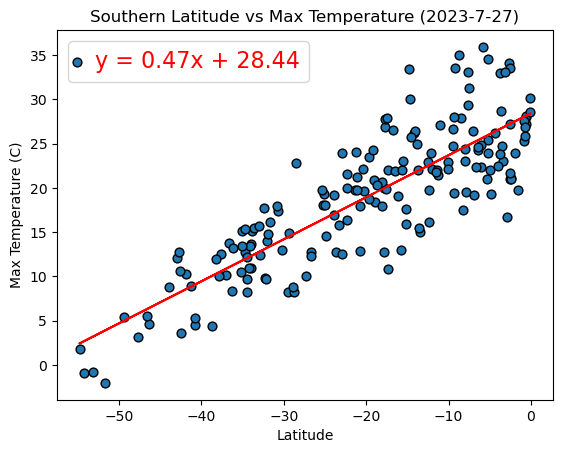

In [24]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Max Temp')
plt.ylabel("Max Temperature (C)")
plt.title(f"Southern Latitude vs Max Temperature ({date})")

# save figure for readme
plt.savefig("output_data/South_Temp.png")

**Discussion about the linear relationship:**

* N.B. - The linear regression line shows how the value of a scatter point on the y-axis can be predicted by the value on the x-axis. The r-value measures how closely the scatter points fit the line, on a scale of -1 to 1, with zero meaning no relationship between the scatter points and the slope of the line, and an absolute value of 1 meaning an exact fit between the line and the points. So, an r-value close to 1 or -1 means the line detects a significant relationship between the x & y axis. An r-value close to zero signifies the line has no bearing on the relationship between the x & y axis.

Latitude is significantly correlated with maximum temperature. The r-value, while fluctuating based upon the random sample, has an absolute value above 0.6, often closer to 0.9. The dependent variable, max temperature, decreases as the independent variable, latitude, moves away from the equator.

Note that this means the southern linear regression will have a positive slope and positive r-value (temperature increases as negative latitude decreases to zero), while the northern linear regression will have a negative slope and negative r-value (temperature decreases as positive latitude increases from zero). Regardless, the absolute value of the r-value remains consistently strong.

The strength of these values will fluctuate seasonally. So, the northern and southern values for slope and r-value should converge closest around the equinoxes and diverge strongest around the solstices (the north will be generally warmer in June/July, lessening the slope and r-value, while exaggerating it for the southern hemisphere - and vice versa)

Also, note that the southern hemisphere generally has fewer cities (maybe half?) than the northern hemisphere. The smaller sample size could be skewing the results somewhat.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02520623998324547


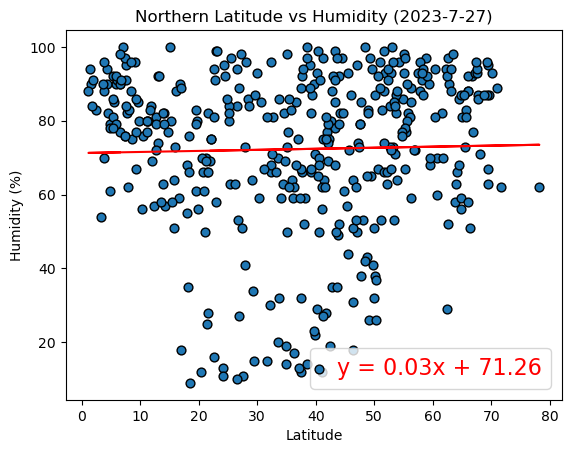

In [18]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Humidity')
plt.ylabel("Humidity (%)")
plt.title(f"Northern Latitude vs Humidity ({date})")
plt.show()

The r-value is: -0.17376745838224134


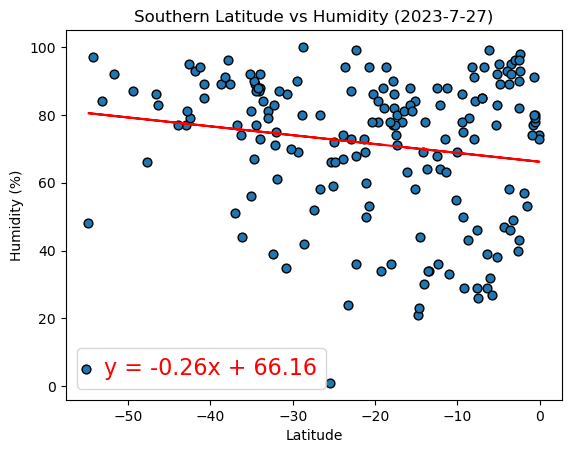

In [19]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Humidity')
plt.ylabel("Humidity (%)")
plt.title(f"Southern Latitude vs Humidity ({date})")
plt.show()

**Discussion about the linear relationship:**

* N.B. - The linear regression line shows how the value of a scatter point on the y-axis can be predicted by the value on the x-axis. The r-value measures how closely the scatter points fit the line, on a scale of -1 to 1, with zero meaning no relationship between the scatter points and the slope of the line, and an absolute value of 1 meaning an exact fit between the line and the points. So, an r-value close to 1 or -1 means the line detects a significant relationship between the x & y axis. An r-value close to zero signifies the line has no bearing on the relationship between the x & y axis.

Humidity is weakly correlated with distance from the equator. The r-value huddles close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. Latitude has little bearing on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0868227670373541


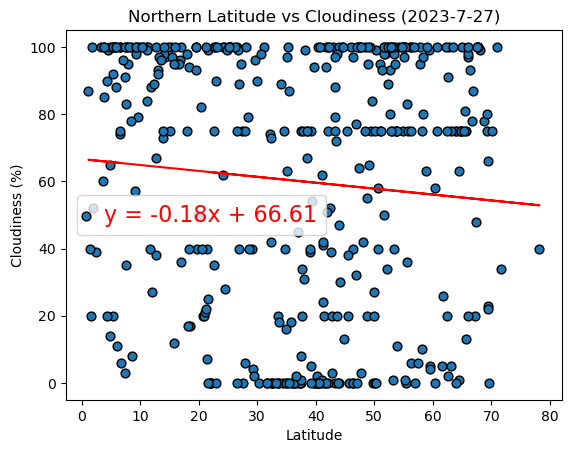

In [20]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Latitude vs Cloudiness ({date})")
plt.show()

The r-value is: -0.02748558165504891


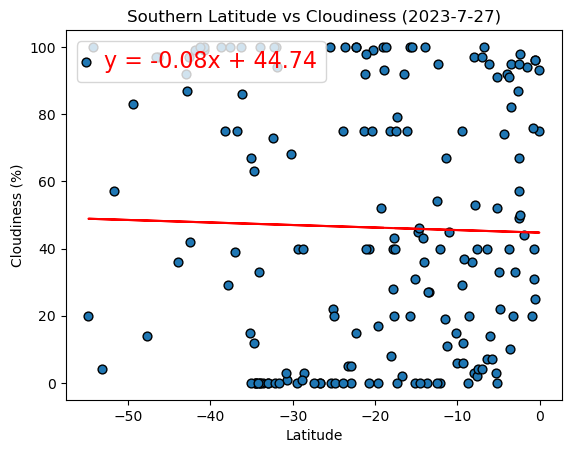

In [21]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Latitude vs Cloudiness ({date})")
plt.show()

**Discussion about the linear relationship:**

* N.B. - The linear regression line shows how the value of a scatter point on the y-axis can be predicted by the value on the x-axis. The r-value measures how closely the scatter points fit the line, on a scale of -1 to 1, with zero meaning no relationship between the scatter points and the slope of the line, and an absolute value of 1 meaning an exact fit between the line and the points. So, an r-value close to 1 or -1 means the line detects a significant relationship between the x & y axis. An r-value close to zero signifies the line has no bearing on the relationship between the x & y axis.

Cloudiness is weakly correlated with distance from the equator. The r-value stays close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. Latitude has little bearing on cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1568785850896968


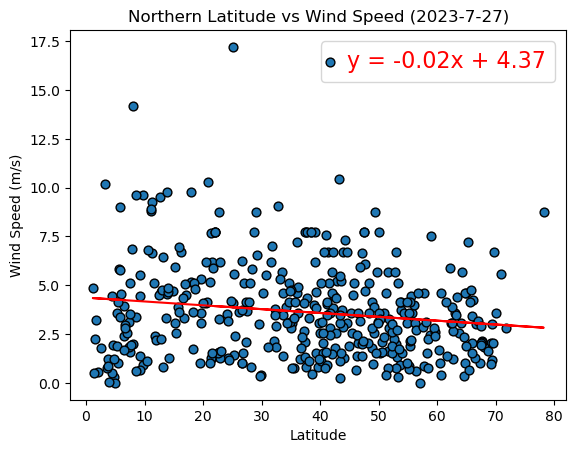

In [22]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Wind Speed')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Latitude vs Wind Speed ({date})")
plt.show()

The r-value is: -0.11541345510442125


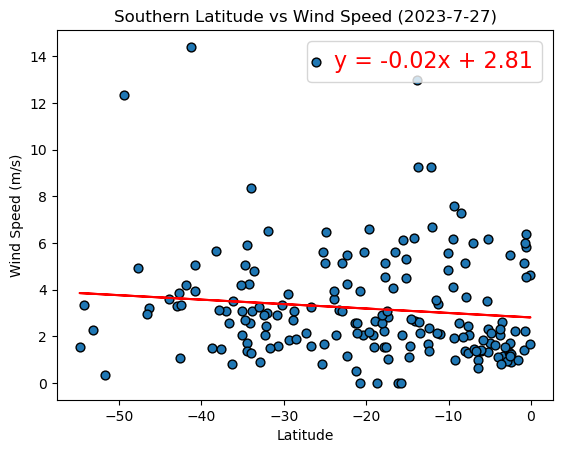

In [23]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Wind Speed')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Latitude vs Wind Speed ({date})")
plt.show()

**Discussion about the linear relationship:** 

* N.B. - The linear regression line shows how the value of a scatter point on the y-axis can be predicted by the value on the x-axis. The r-value measures how closely the scatter points fit the line, on a scale of -1 to 1, with zero meaning no relationship between the scatter points and the slope of the line, and an absolute value of 1 meaning an exact fit between the line and the points. So, an r-value close to 1 or -1 means the line detects a significant relationship between the x & y axis. An r-value close to zero signifies the line has no bearing on the relationship between the x & y axis.

Wind speed is weakly correlated with distance from the equator. The r-value remains close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. Latitude has little bearing on wind speed.